In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
   

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
## actual len = 68 * 32 bcz each batch has length 32 

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 2 1 1 0 1 1 1 1 0 0 1 1 0 1]


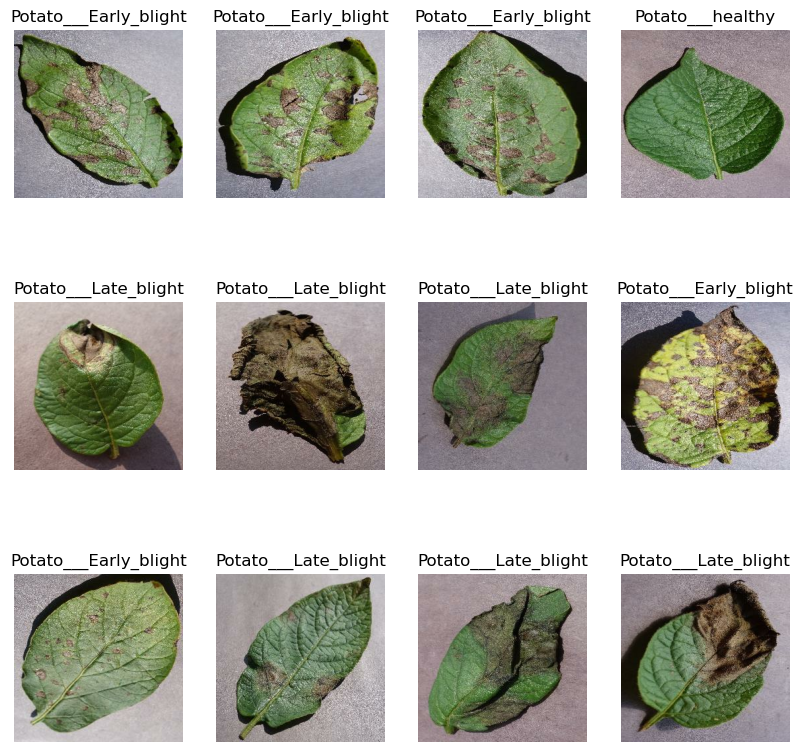

In [7]:
# visualizing the first image
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
80 % ==>training 
20% ==> 10% validation , 10% test


In [8]:
train_size = 0.8
len(dataset) * train_size



54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size= 0.1
len(dataset) * val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split =0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds,test_ds

In [15]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len( val_ds)

6

In [18]:
 len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])   

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal and vertical"),
    layers.RandomRotation(0.2)
]) 

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =3

model = models.Sequential([
    layers.InputLayer(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size= (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
])

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,219 (1.13 MB)

 Trainable params: 297,219 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [28]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
) 

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.5005 - loss: 0.9185 - val_accuracy: 0.5469 - val_loss: 0.8389
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.7616 - loss: 0.6014 - val_accuracy: 0.8073 - val_loss: 0.5272
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.7720 - loss: 0.6011 - val_accuracy: 0.8333 - val_loss: 0.5864
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.8606 - loss: 0.3444 - val_accuracy: 0.8750 - val_loss: 0.3067
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9060 - loss: 0.2518 - val_accuracy: 0.9323 - val_loss: 0.1674
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 619s 12s/step - accuracy: 0.9389 - loss: 0.1583 - val_accuracy: 0.9635 - val_loss: 0.0833
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9550 - loss: 0.1111 - val_accuracy: 0.9531 - val_loss: 0.0935
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9096 - loss: 0.2756 - val_accuracy: 0.9375 - 

In [29]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 853ms/step - accuracy: 0.9974 - loss: 0.0157


In [30]:
scores

[0.015741640701889992, 0.99609375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history['accuracy']

[0.5515046119689941,
 0.7899305820465088,
 0.8015046119689941,
 0.8709490895271301,
 0.9253472089767456,
 0.9456018805503845,
 0.9496527910232544,
 0.9346064925193787,
 0.9432870149612427,
 0.9438657164573669,
 0.96875,
 0.9751157164573669,
 0.9693287014961243,
 0.9635416865348816,
 0.9716435074806213,
 0.9716435074806213,
 0.9693287014961243,
 0.9728009104728699,
 0.9826388955116272,
 0.9780092835426331,
 0.96875,
 0.9774305820465088,
 0.9890046119689941,
 0.9791666865348816,
 0.9600694179534912,
 0.9872685074806213,
 0.9890046119689941,
 0.9930555820465088,
 0.9733796119689941,
 0.9803240895271301,
 0.9832175970077515,
 0.9832175970077515,
 0.9809027910232544,
 0.9901620149612427,
 0.9930555820465088,
 0.9959490895271301,
 0.9780092835426331,
 0.9670138955116272,
 0.9901620149612427,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9143518805503845,
 0.9675925970077515,
 0.9832175970077515,
 0.9797453880310059,
 0.9913194179534912,
 0.9884259104728699,
 0.99016201496

In [35]:
loss = history.history['loss']
acc =  history.history['accuracy']
val_acc =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

Text(0.5, 1.0, ' Training and Validation Loss')

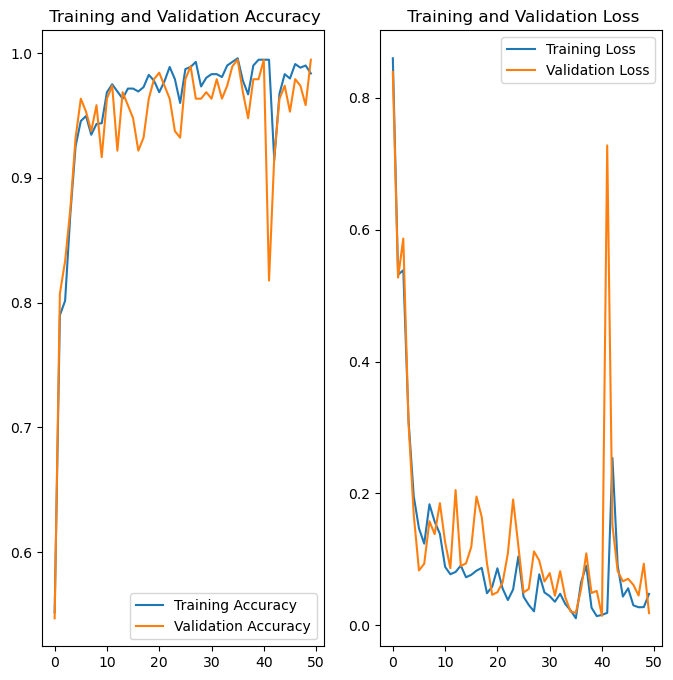

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title(' Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title(' Training and Validation Loss')



first image to predict
actual label : Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
predicted label:  Potato___Late_blight


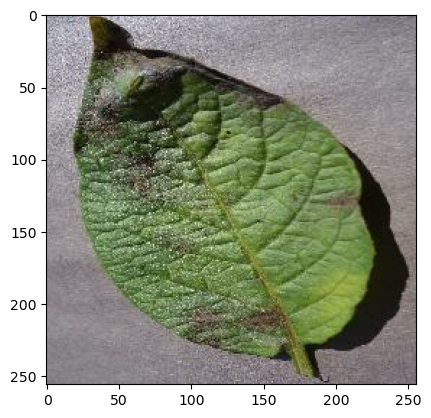

In [40]:
import numpy as np
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label :", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    
    



In [53]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) ## create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


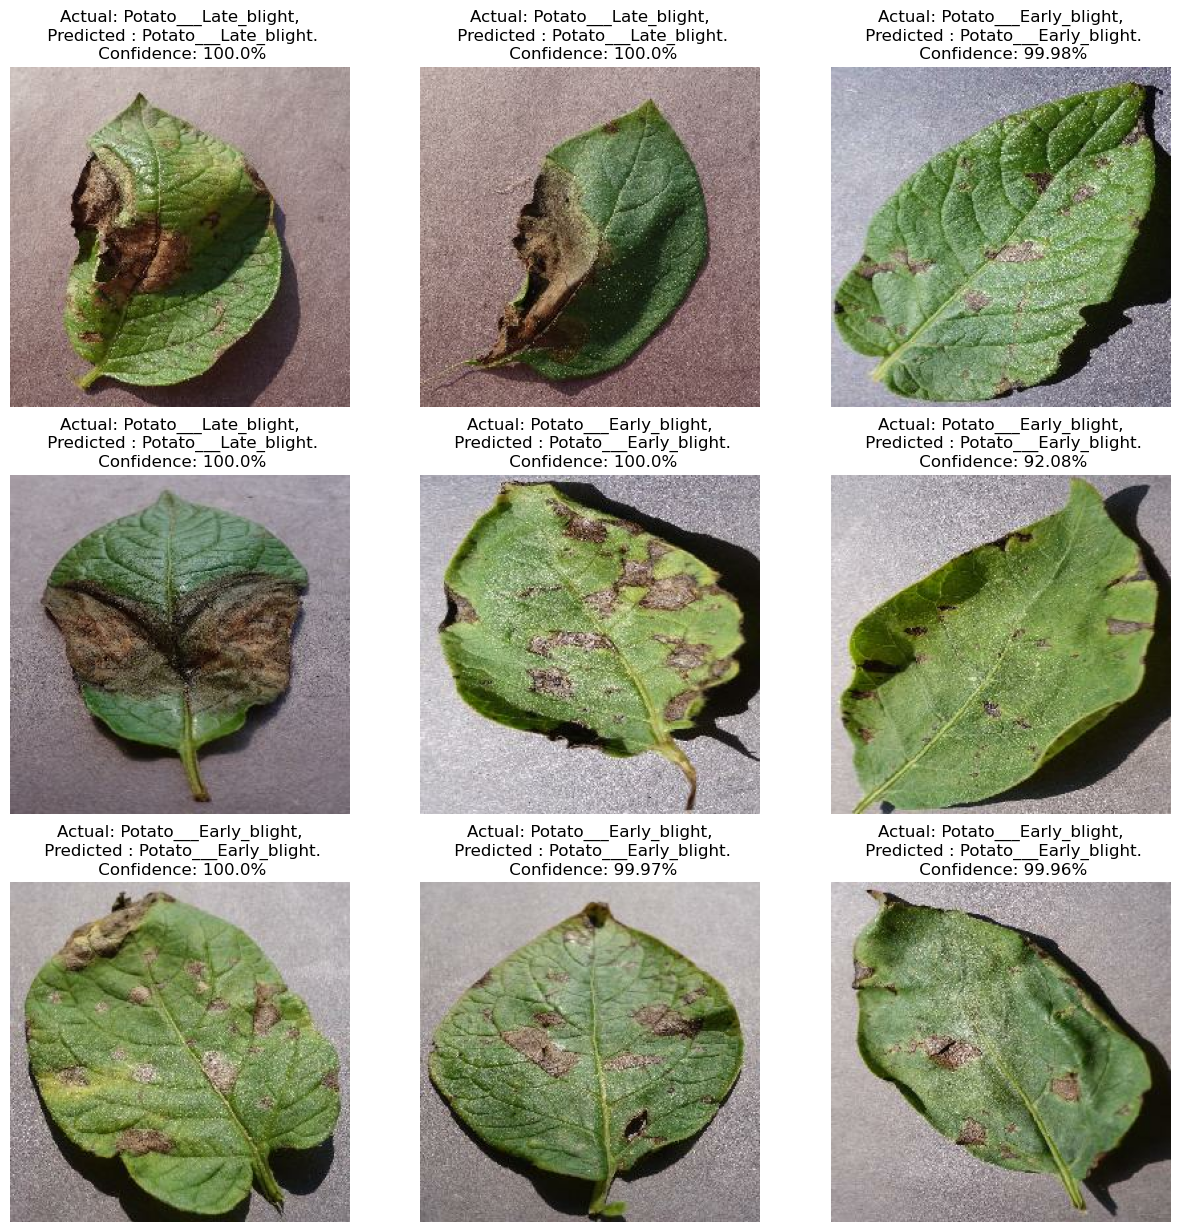

In [56]:
plt.figure(figsize = (15,15))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted : {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [60]:
import os
model_version = 1
save_path = f"../models/{model_version}.keras"  # Using the .keras extension
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model.save(save_path)


In [64]:
model_version_1 = 2
save_path = f"../models/{model_version_1}.keras"  # Using the .keras extension
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model.save(save_path)

In [65]:
model_version_2 = 3
save_path = f"../models/{model_version_2}.keras"  # Using the .keras extension
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model.save(save_path)